In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
from sklearn import preprocessing
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [2]:
df_bc = pd.read_csv('preprocess/bitcoin.csv',index_col='Date')
df_gold = pd.read_csv('preprocess/gold.csv',index_col='Date')
df_oil = pd.read_csv('preprocess/oil.csv',index_col='Date')
df_vix = pd.read_csv('preprocess/vix.csv',index_col='Date')
df_sp500 = pd.read_csv('preprocess/sp500.csv',index_col='Date')

In [3]:
dfs= [df_bc,df_gold,df_oil,df_vix,df_sp500]

In [4]:
dfs_label=[]
for df in dfs:
    dfs_label.append((df['Type'].unique()[0]))

In [5]:
dfs_label

['BTC', 'Gold', 'Oil', 'VIX', 'SP500']

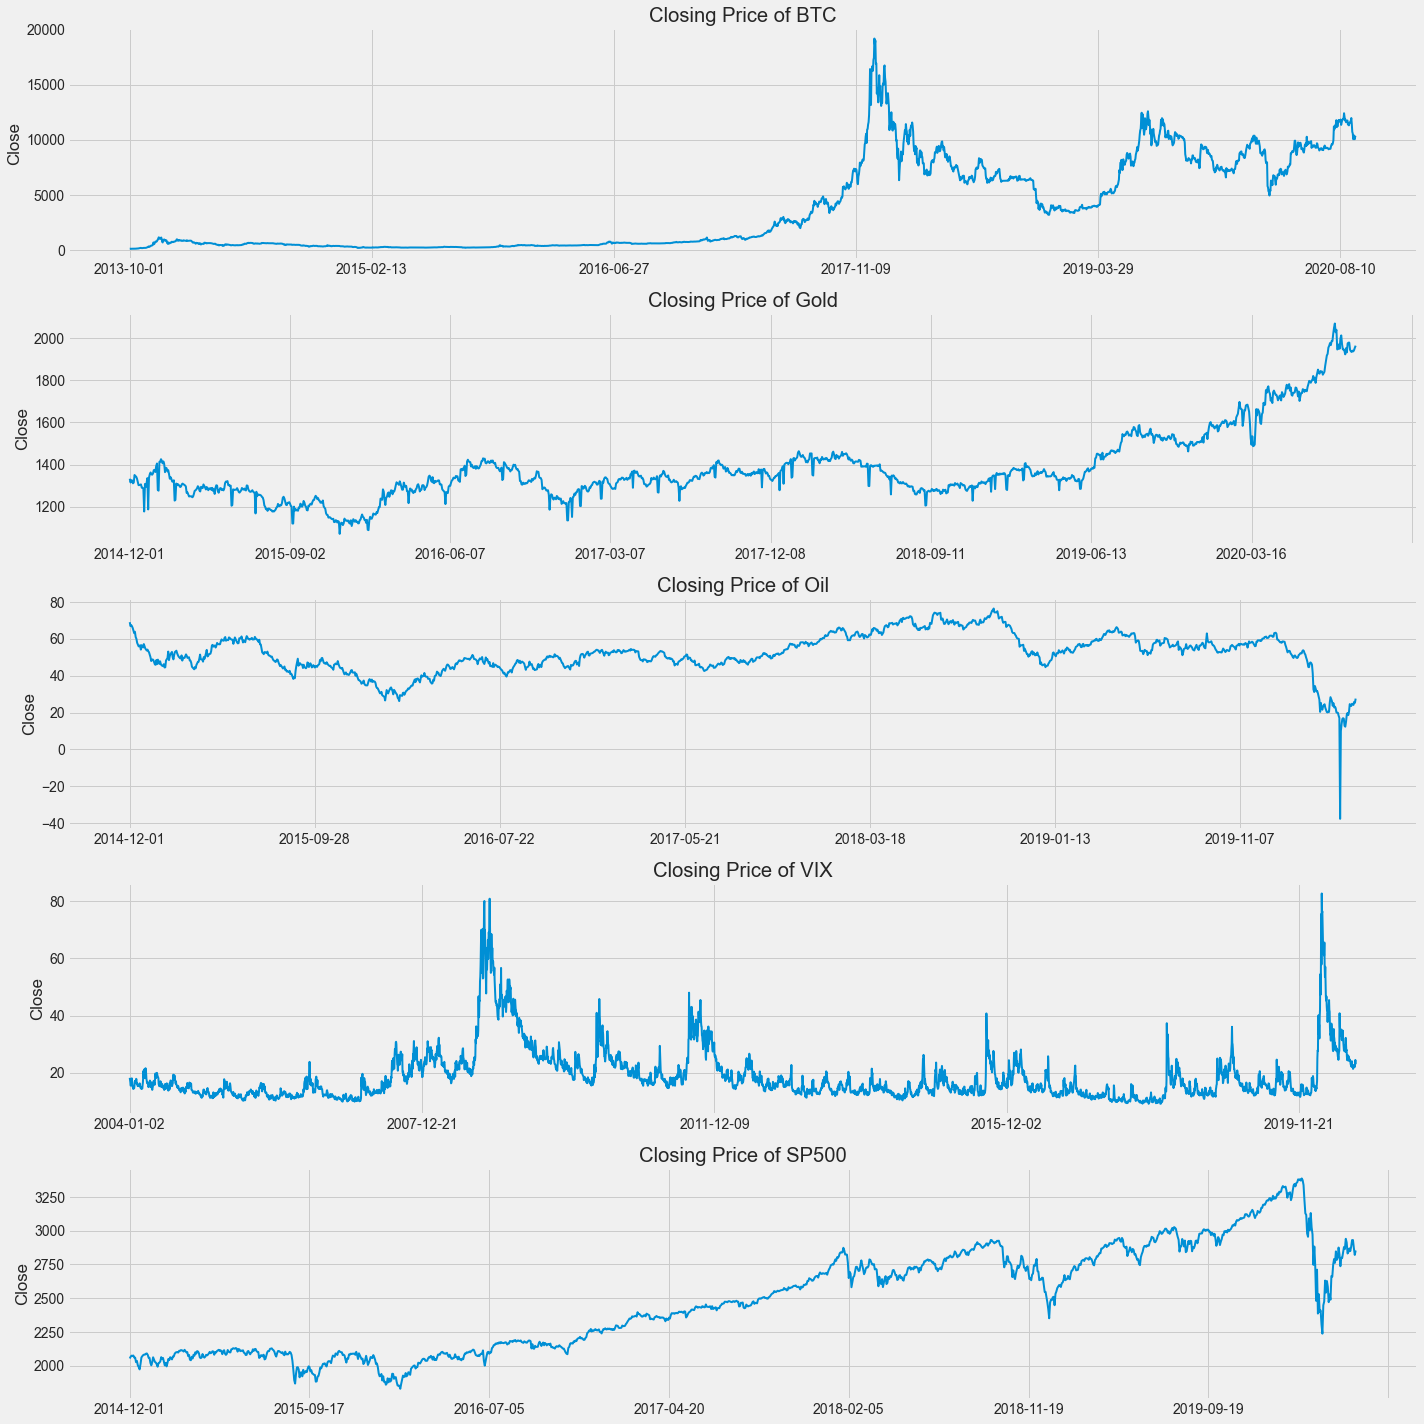

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(20,20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, df in enumerate(dfs, 1):
    plt.subplot(5, 1, i)
    df['Close'].plot(linewidth=2)
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {dfs_label[i - 1]}")    
plt.tight_layout()

An exception occurred
An exception occurred


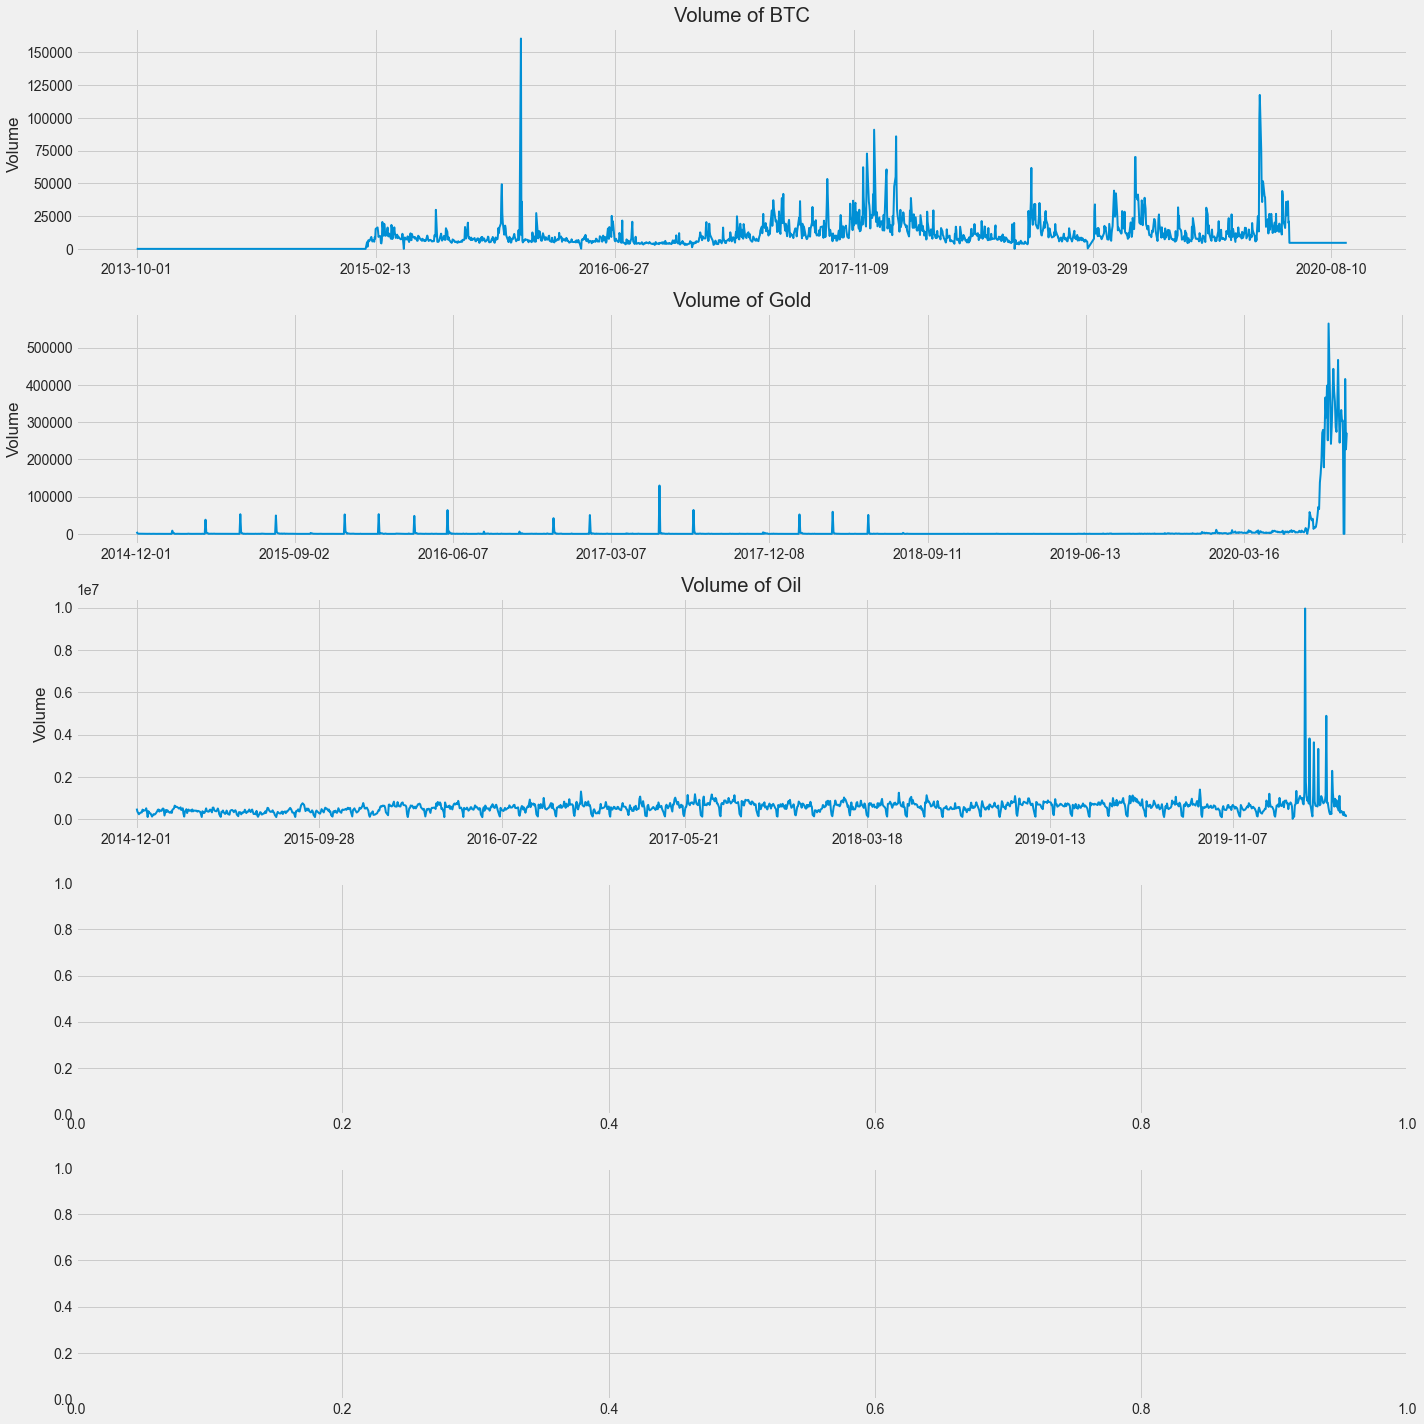

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(20,20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, df in enumerate(dfs, 1):
    try:
        plt.subplot(5, 1, i)
        df['Volume'].plot(linewidth=2)
        plt.ylabel('Volume')
        plt.xlabel(None)
        plt.title(f"Volume of {dfs_label[i - 1]}")
    except:
        print("An exception occurred")
plt.tight_layout()

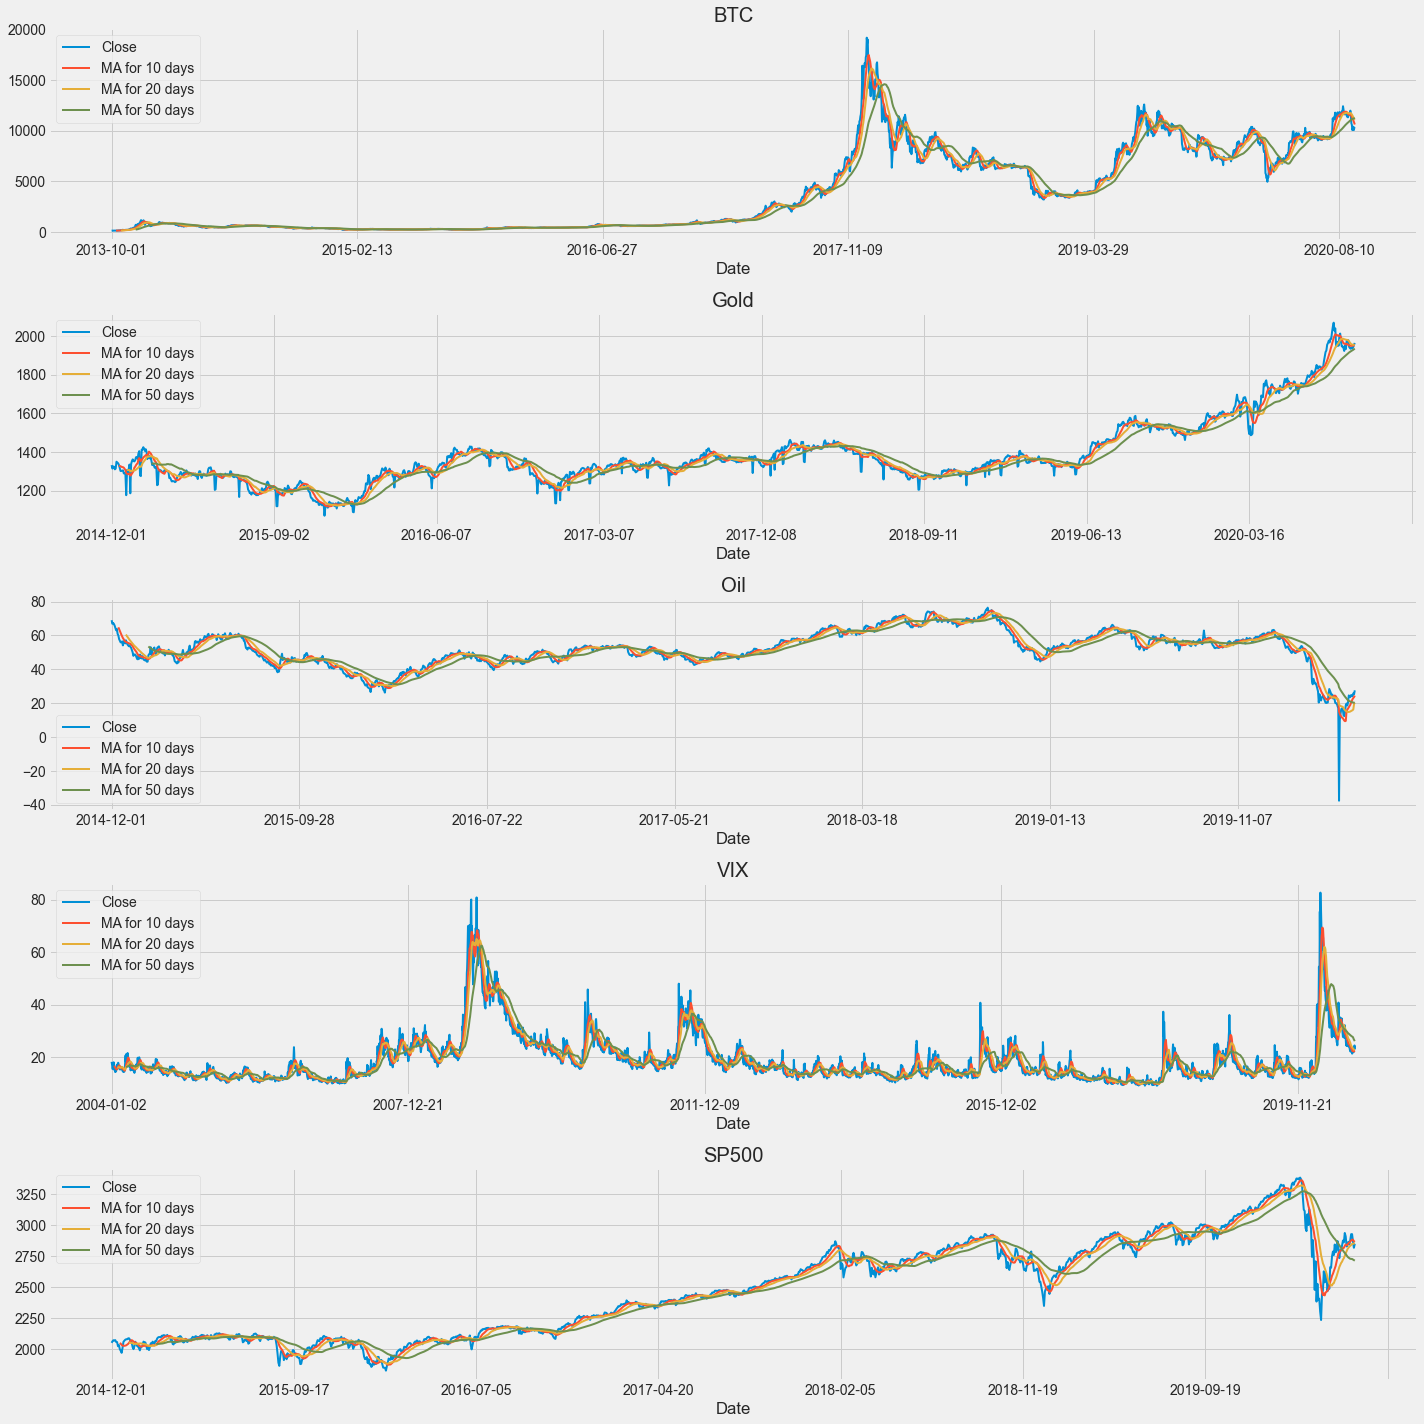

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for df in dfs:
        title = f"MA for {ma} days"
        df[title] = df['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=5, ncols=1)
fig.set_figheight(20)
fig.set_figwidth(20)

for i in range(0, 5):
    dfs[i][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i],linewidth=2)
    axes[i].set_title(dfs_label[i])

fig.tight_layout()




# for df,t in zip(dfs, title): 
#     df['MA10_Close'] =  df['Close'].rolling(10).mean()
#     df['MA50_Close'] =  df['Close'].rolling(50).mean()  
#     df[['Close','MA10_Close','MA50_Close']].plot(linewidth=2,figsize=(20,3))  
#     # df['MA10_Close'].plot(linewidth=1,label='MA10_Close')  
#     # df['MA20_Close'].plot(linewidth=1,label='MA20_Close')  
#     plt.title(f'{t + " [close] and MA "}') 
#     plt.show()

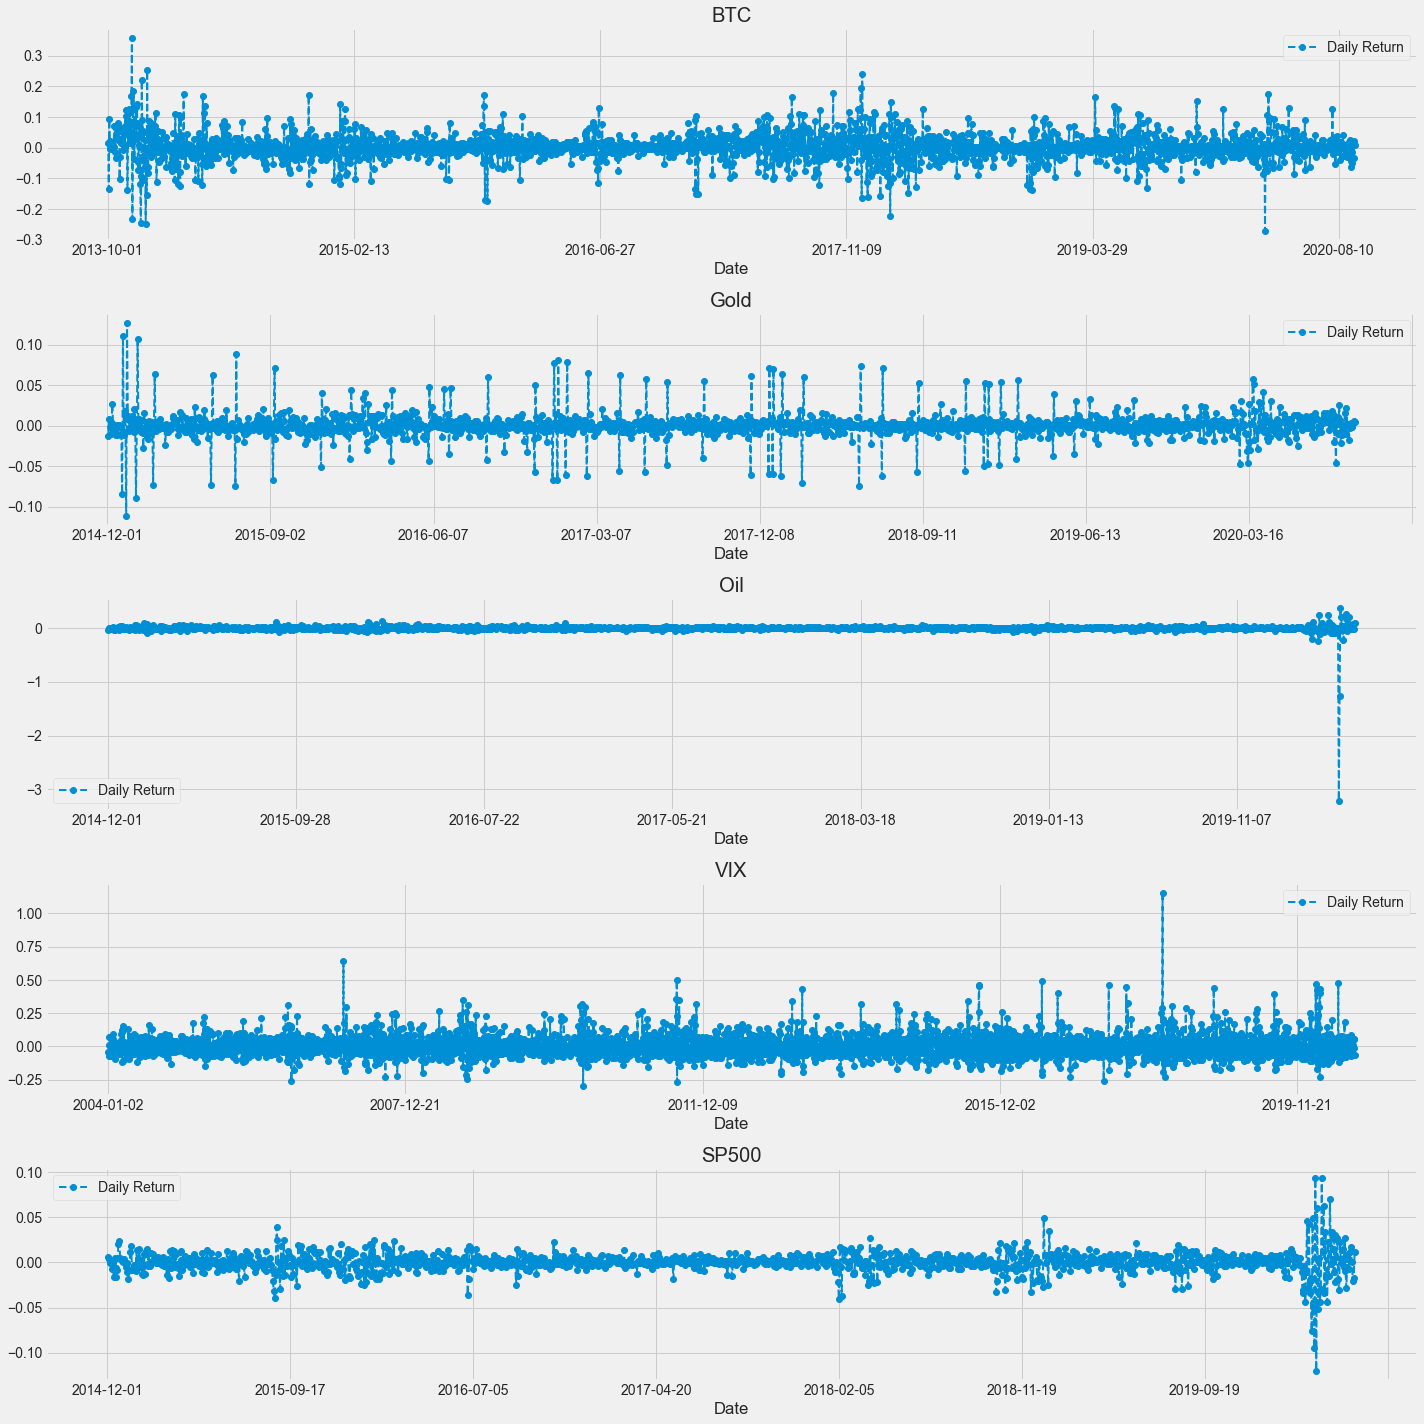

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1)
fig.set_figheight(20)
fig.set_figwidth(20)

# We'll use pct_change to find the percent change for each day
for df in dfs:
    df['Daily Return'] = df['Close'].pct_change()

for i in range(0, 5):
    dfs[i]['Daily Return'].plot(ax=axes[i], legend=True, linestyle='--', marker='o',linewidth=2)
    axes[i].set_title(dfs_label[i])

fig.tight_layout()





# We'll use pct_change to find the percent change for each day
# for company in company_list:
#     company['Daily Return'] = company['Adj Close'].pct_change()

# # Then we'll plot the daily return percentage
# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.set_figheight(10)
# fig.set_figwidth(15)

# AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
# axes[0,0].set_title('APPLE')

# GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
# axes[0,1].set_title('GOOGLE')

# MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
# axes[1,0].set_title('MICROSOFT')

# AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
# axes[1,1].set_title('AMAZON')

# fig.tight_layout()

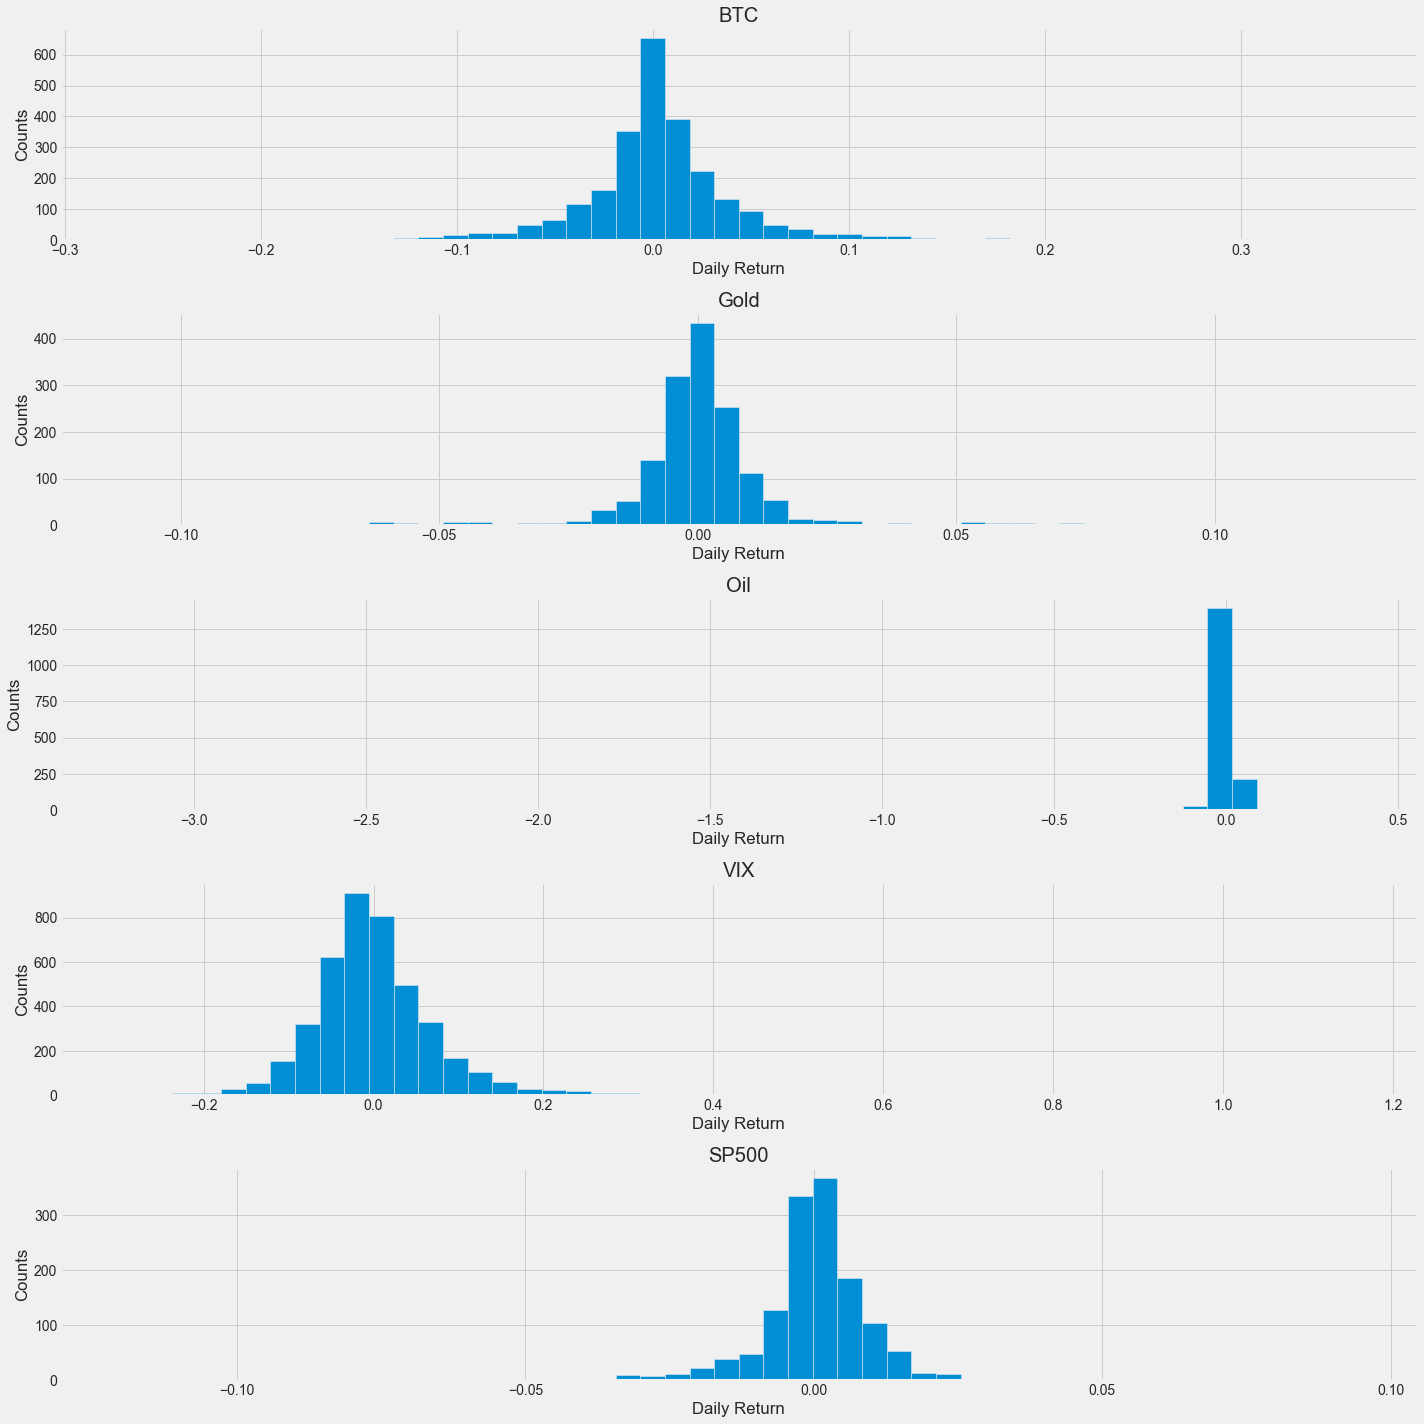

In [14]:
plt.figure(figsize=(20, 20))

for i, df in enumerate(dfs, 1):
    plt.subplot(5, 1, i)
    df['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{dfs_label[i - 1]}')
    
plt.tight_layout()


# for df,t in zip(dfs, title): 
#     df['Change']=df['Close'].pct_change()
#     df_temp = df[df.Change != 0]
#     plt.figure(figsize=(20,5))
#     df_temp['Change'].hist(bins=50)   
#     plt.title(f'{t}')
#     plt.show()

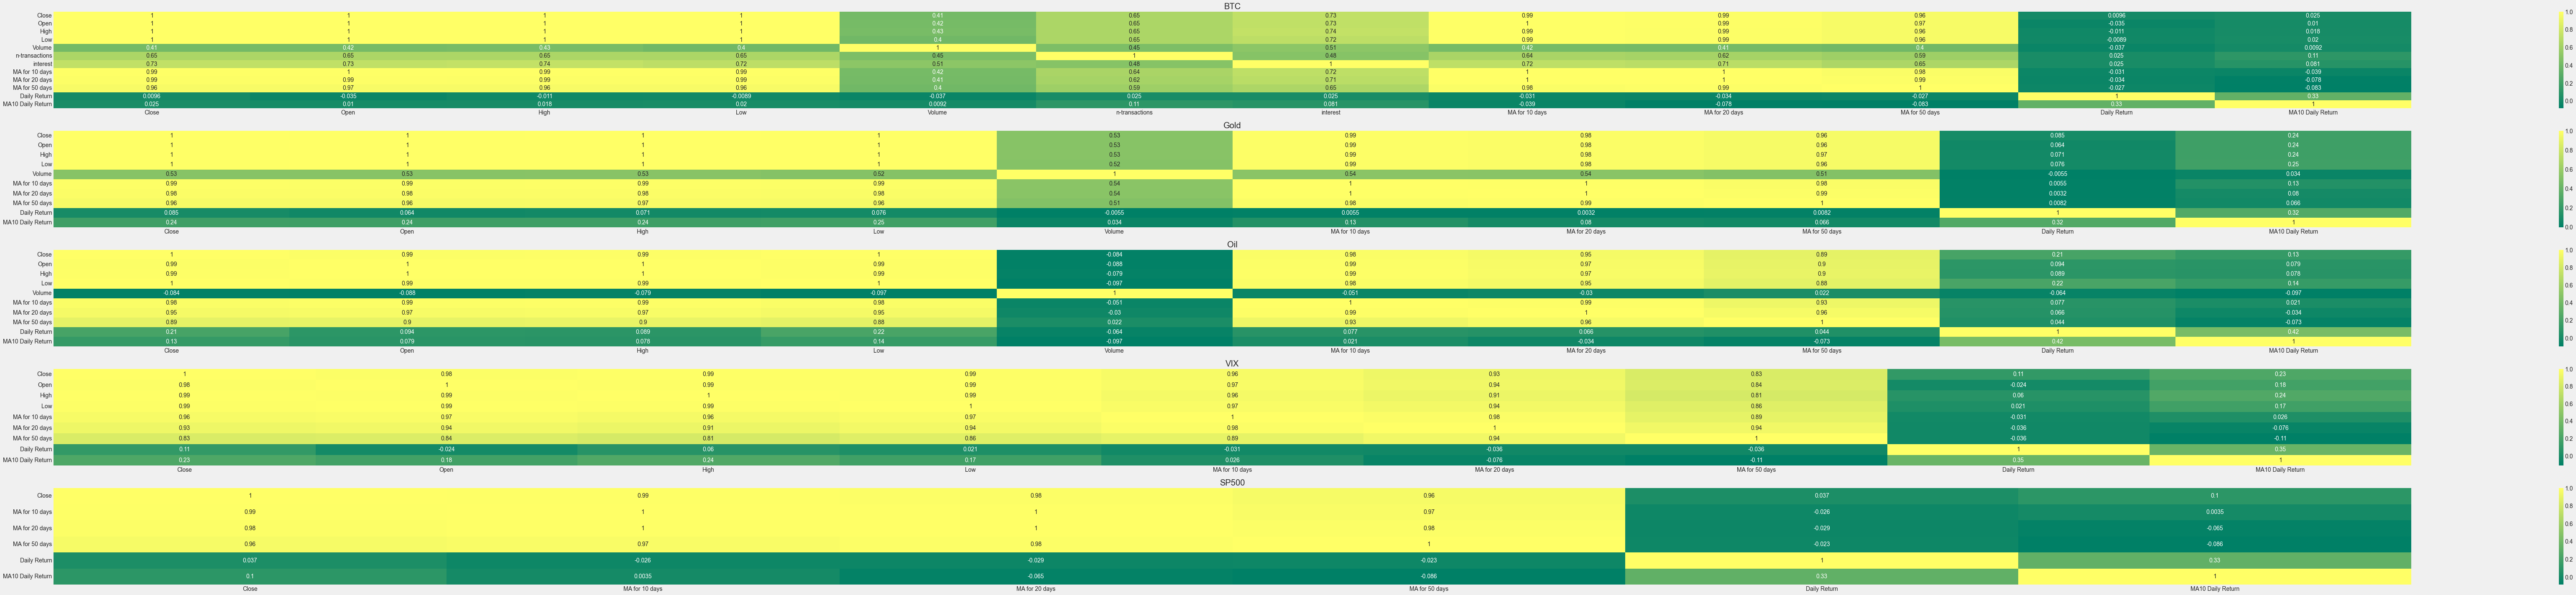

In [40]:
plt.figure(figsize=(100, 20))

for i, df in enumerate(dfs, 1):
    plt.subplot(5, 1, i)
    sns.heatmap(df.corr(), annot=True, cmap='summer')
    plt.title(f'{dfs_label[i - 1]}')
    
plt.tight_layout()


# plt.subplot(2, 2, 1)
# sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
# plt.title('Correlation of stock return')

# plt.subplot(2, 2, 2)
# sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
# plt.title('Correlation of stock closing price')

In [24]:
closing_df  = pd.merge(dfs[0]['Close'],dfs[1]['Close'],left_index=True, right_index=True ,how='inner')
closing_df  = closing_df.merge(dfs[2]['Close'],left_index=True, right_index=True ,how='inner')
closing_df  = closing_df.merge(dfs[3]['Close'],left_index=True, right_index=True ,how='inner')
closing_df  = closing_df.merge(dfs[4]['Close'],left_index=True, right_index=True ,how='inner')


c:\Users\Bruce\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [25]:
closing_df.columns= dfs_label

In [27]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,BTC,Gold,Oil,VIX,SP500
Date,,,,,
2014-12-01,NaN,NaN,NaN,NaN,NaN
2014-12-02,0.004599,-0.013358,-0.030725,-0.100770,0.006384
2014-12-03,0.012147,0.008443,0.007476,-0.029572,0.003765
2014-12-04,-0.015871,-0.001207,-0.008459,-0.007217,-0.001162
2014-12-05,-0.021308,-0.010119,-0.014519,-0.045234,0.001665


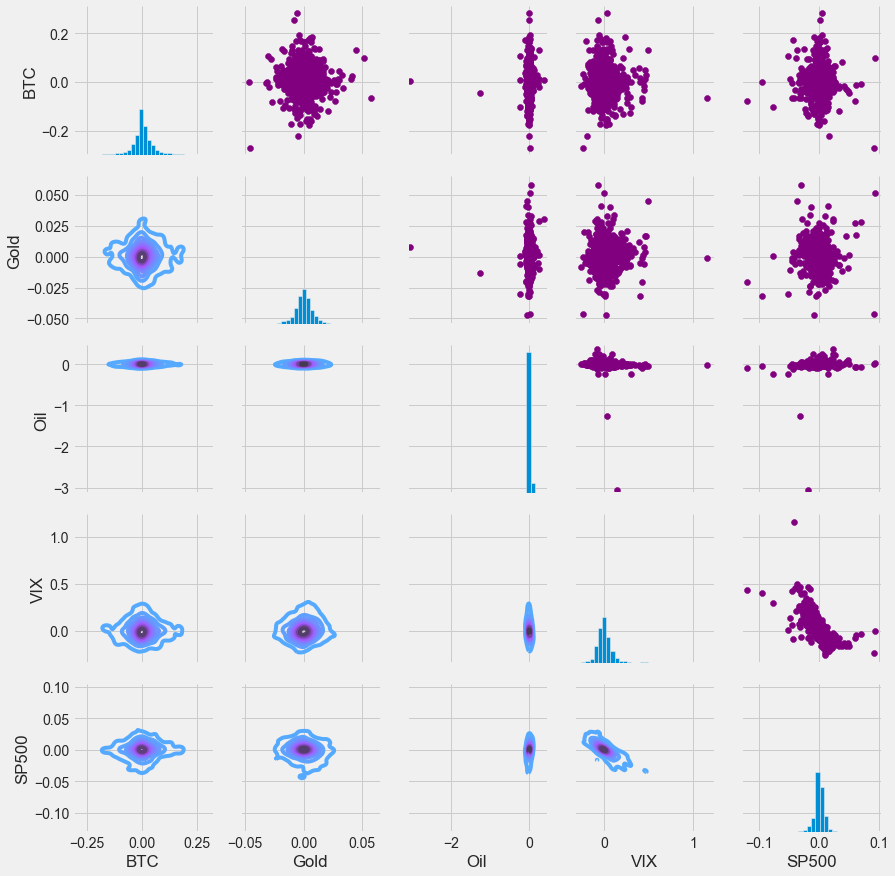

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

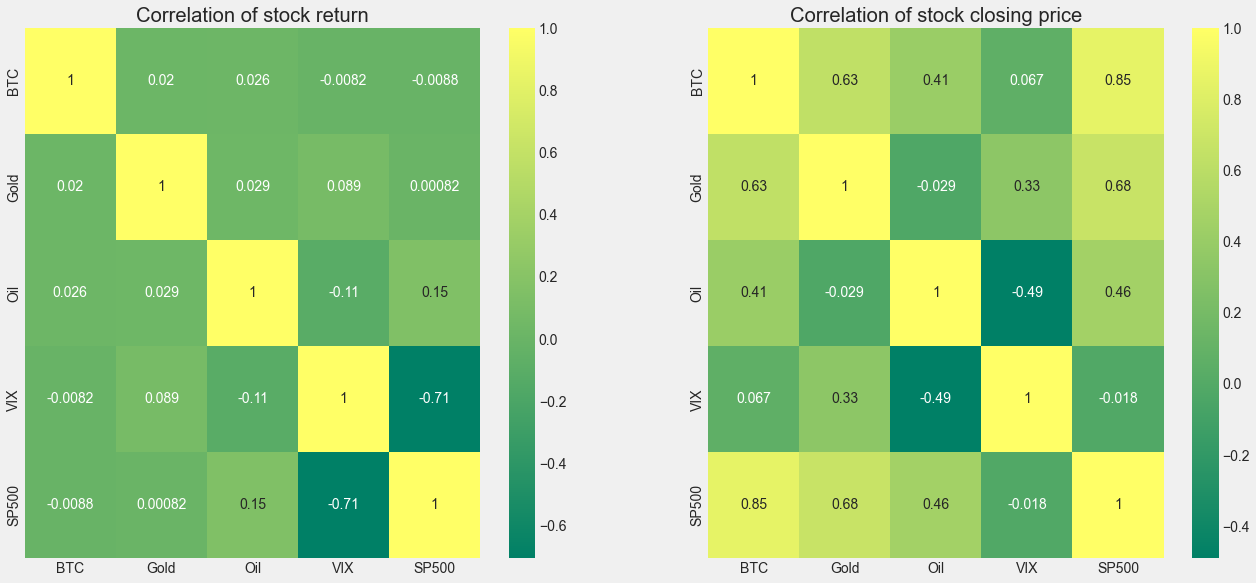

In [36]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

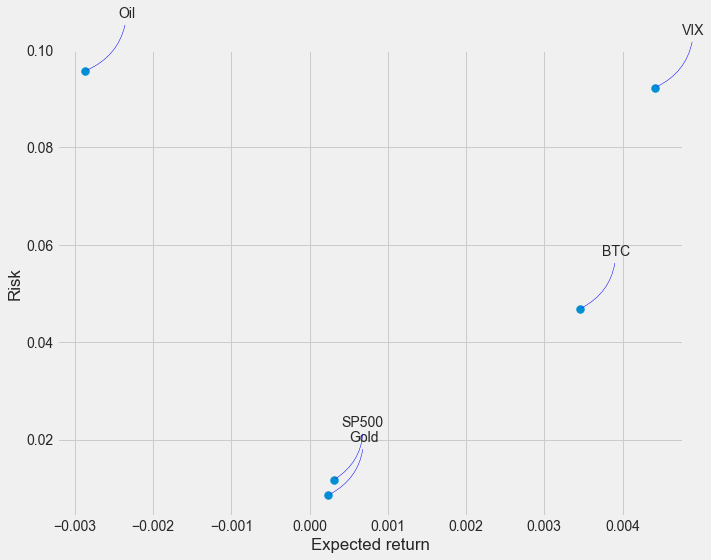

In [38]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))